In [1]:
from sklearn.tree import DecisionTreeClassifier  #ładowanie fukcji do tworzenia instacji drzew dla Y ciaglego

#import dtreeviz.trees as dtv # importowanie dtreeviz

import pandas as pd
import numpy as np
import seaborn as sn

from sklearn.model_selection import cross_val_score,  StratifiedKFold
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer


from sklearn.model_selection import cross_val_score,  StratifiedKFold

In [9]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_M.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [10]:
train_df=train_df.loc[(train_df['scale']!='MX')]

In [11]:
train_df

,ENSG00000212232.1,ENSG00000238741.1,ENSG00000252481.1,ENSG00000239002.3,ENSG00000212443.1,ENSG00000274012.1,ENSG00000252010.1,ENSG00000202198.1,ENSG00000251791.1,ENSG00000202058.1,...,ENSG00000241475.1,ENSG00000274618.1,ENSG00000227293.1,ENSG00000253526.1,ENSG00000270654.1,ENSG00000271394.1,ENSG00000265423.1,ENSG00000253165.1,ENSG00000201901.1,scale
0,27.356617,31.768974,27.356617,5.294829,8.824715,6.645010e+02,2.647415,4.235863e+02,7.059772,16.766959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M0
1,8.695633,1.086954,6.521724,2.173908,0.000000,1.758692e+03,1.086954,5.434770e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M0
2,20.185177,77.002713,7.475992,4.485595,8.971190,2.775836e+03,2.242797,2.609121e+02,6.728392,10.466388,...,0.000000,0.747599,0.000000,0.747599,0.000000,0.747599,0.000000,0.0,0.000000,M0
3,18.157930,17.431612,6.536855,2.178952,2.905269,2.338741e+02,3.631586,6.827382e+01,1.452634,1.452634,...,0.726317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M0
4,29912.168049,21631.677176,9554.333460,20332.131551,5136.495208,1.255850e+06,19221.760289,1.926818e+06,5198.182500,2655.637935,...,0.000000,953.068666,0.000000,20.562431,0.000000,269.367843,64.771657,0.0,123.374585,M0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,10.162692,2.540673,5.081346,2.540673,0.000000,3.506976e+03,10.162692,2.345888e+02,2.540673,1.693782,...,0.000000,1.693782,0.000000,0.000000,0.000000,1.693782,0.846891,0.0,0.000000,M1
706,8.657314,4.328657,7.791583,2.597194,0.000000,1.103808e+03,6.925851,4.068938e+01,9.523046,5.194389,...,0.000000,0.000000,0.865731,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M1
707,13.471784,17.145907,25.718861,2.449415,3.674123,2.878063e+02,9.797661,9.185307e+01,11.022369,34.291814,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.449415,1.224708,0.0,3.674123,M1
708,12.814782,34.706702,25.629565,2.135797,11.212935,1.056152e+03,4.271594,1.105275e+02,24.561666,17.620326,...,0.000000,0.533949,0.533949,0.000000,0.533949,0.000000,0.533949,0.0,0.533949,M1


In [12]:
y=train_df['scale']
del train_df['scale']

In [13]:
zestaw_caly = np.array(train_df)
caly_label = np.array(y)

In [14]:
ftwo_scorer = make_scorer(fbeta_score, beta=1,labels=['M0','M1'],pos_label='M1',greater_is_better=True)


In [15]:
param_grid = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'min_samples_split':range(2,6,1),
    'min_samples_leaf': range(1,6,1),    
    'max_leaf_nodes':range(2,6,1),
    'min_impurity_decrease':[0,0.1,0.2],
    'max_depth':list(range(2, 6,1))
}

In [16]:
dt_1 = DecisionTreeClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 6, verbose = 1,scoring=ftwo_scorer)
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': range(2, 6),
                         'min_impurity_decrease': [0, 0.1, 0.2],
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6),
                         'splitter': ['best', 'random']},
             scoring=make_scorer(fbeta_score, beta=1, labels=['M0', 'M1'], pos_label=M1),
             verbose=1)

In [17]:
grid_search_1.best_score_

0.12230825496342738

In [18]:
grid_search_1.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

### Dobieranie part.2

In [19]:
param_grid = {
    'criterion':['gini'],
    'splitter':['best',],
    'min_samples_split':range(2,15,1),
    'min_samples_leaf': range(2,5,1),    
    'max_leaf_nodes':range(2,15,1),
    'min_impurity_decrease':[0],
    'max_depth':range(2,15,1)
}

In [20]:
dt_1 = DecisionTreeClassifier(random_state=42)

grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 6, verbose = 1,scoring=ftwo_scorer)
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 6591 candidates, totalling 32955 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=6,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 15),
                         'max_leaf_nodes': range(2, 15),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(2, 15),
                         'splitter': ['best']},
             scoring=make_scorer(fbeta_score, beta=1, labels=['M0', 'M1'], pos_label=M1),
             verbose=1)

In [21]:
grid_search_1.best_score_#0.17815571639524969

0.18826493388052895

In [22]:
grid_search_1.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 14,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

## Dobieranie part .3

In [23]:
param_grid = {
    'criterion':['gini'],
    'splitter':['best',],
    'min_samples_split':range(2,15,1),
    'min_samples_leaf': range(2,5,1),    
    'max_leaf_nodes':range(10,30,1),
    'min_impurity_decrease':[0],
    'max_depth':range(2,15,1)
}

In [24]:
dt_1 = DecisionTreeClassifier(random_state=42)

grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 6, verbose = 1,scoring=ftwo_scorer)
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 10140 candidates, totalling 50700 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=6,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 15),
                         'max_leaf_nodes': range(10, 30),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(2, 15),
                         'splitter': ['best']},
             scoring=make_scorer(fbeta_score, beta=1, labels=['M0', 'M1'], pos_label=M1),
             verbose=1)

In [26]:
grid_search_1.best_score_#0.17815571639524969

0.24875317510173978

In [25]:
grid_search_1.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_leaf_nodes': 29,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 3,
 'min_samples_split': 14,
 'splitter': 'best'}

In [28]:
param_grid = {
    'criterion':['gini'],
    'splitter':['best',],
    'min_samples_split':range(10,25,1),
    'min_samples_leaf': range(2,5,1),    
    'max_leaf_nodes':range(20,50,1),
    'min_impurity_decrease':[0],
    'max_depth':range(2,15,1)
}

In [29]:
dt_1 = DecisionTreeClassifier(random_state=42)

grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 6, verbose = 1,scoring=ftwo_scorer)
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 17550 candidates, totalling 87750 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=6,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 15),
                         'max_leaf_nodes': range(20, 50),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(10, 25),
                         'splitter': ['best']},
             scoring=make_scorer(fbeta_score, beta=1, labels=['M0', 'M1'], pos_label=M1),
             verbose=1)

In [30]:
grid_search_1.best_score_#0.17815571639524969

0.24912280701754383

In [31]:
grid_search_1.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 30,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'splitter': 'best'}

In [34]:
grid_search_1.best_estimator_

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=30, min_impurity_decrease=0,
                       min_samples_leaf=3, min_samples_split=10,
                       random_state=42)

## Cross - walidacja

In [35]:
kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    dt_2 =DecisionTreeClassifier(max_depth=7, max_leaf_nodes=30, min_impurity_decrease=0,
                       min_samples_leaf=3, min_samples_split=10,
                       random_state=42)
    

    dt_2.fit(zestaw_caly[train], caly_label[train])
    predykcje=dt_2.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    blad=fbeta_score(caly_label[test], predykcje, average='binary', beta=1,labels=['M0','M1'],pos_label='M1')
    wart_2.append(blad)
    licznik+=1

In [36]:
dane_do_zapisu_2.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_M_Drzewo_decyzyjne.csv')

In [3]:
dane_do_zapisu_2=pd.read_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\M\\Klasa_M_Drzewo_decyzyjne.csv')

In [37]:
wart_2

[0.2162162162162162,
 0.19354838709677416,
 0.18749999999999997,
 0.2105263157894737,
 0.358974358974359]

In [4]:
dane_do_zapisu_2

,Unnamed: 0,pred,obs,Fold
0,0,M0,M0,1
1,1,M0,M0,1
2,2,M0,M0,1
3,3,M0,M0,1
4,4,M0,M0,1
...,...,...,...,...
705,137,M1,M1,5
706,138,M0,M1,5
707,139,M1,M1,5
708,140,M1,M1,5


In [5]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

In [6]:
cf_matrix

array([[554,  48],
       [ 87,  21]], dtype=int64)

In [7]:
import seaborn as sns

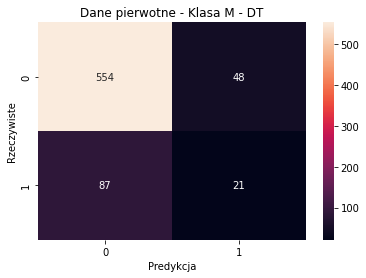

In [8]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa M - DT')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [43]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['M0','M1'], average='binary',pos_label='M1')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['M0','M1'], average='binary',pos_label='M1')
f1score=fbeta_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['M0','M1'], average='binary',pos_label='M1', beta=1)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.194
Precision: 0.304
F1score: 0.237
